In [ ]:
# Import the libraries

In [21]:
# Import necessary libraries
import os  # Operating system-related functions
import shutil  # File operations
import cv2  # OpenCV for image processing
import numpy as np  # NumPy for numerical operatioans
import matplotlib.pyplot as plt  # Matplotlib for plotting
from skimage import io  # Image I/O from scikit-image
import matplotlib.image as mpimg  # Matplotlib for image plotting
from sklearn.preprocessing import LabelEncoder  # Encoding categorical labels
from keras.preprocessing.sequence import pad_sequences  # Padding sequences for model input
import pandas as pd  # Pandas for data manipulation
from sklearn.utils import shuffle  # Shuffling data
from sklearn.model_selection import train_test_split  # Splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler  # Standardizing data
from sklearn.metrics import classification_report  # Evaluation metric for classification
from tensorflow.keras.models import Sequential, Model  # Keras Sequential model and generic Model
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Attention, GlobalAveragePooling1D  # Layers for building neural network models

In [ ]:
# Load the Dataset

In [27]:
# Import necessary libraries
import os
import shutil
from pathlib import Path 
import pandas as pd

# Source directories
broadleaf_folder = r'D:\dataset\broadleaf'
grass_folder = r'D:\dataset\grass'
soil_folder = r'D:\dataset\soil'
soybean_folder = r'D:\dataset\soybean'

# Output directory
output_directory = r'D:\Data'

# Ensure the output directory exists, if not, create it
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Function to merge folders
def merge_folders(source_folder, destination_folder):
    # Loop through files in the source folder
    for file_name in os.listdir(source_folder):
        # Get the full path of the source and destination files
        source_file = os.path.join(source_folder, file_name)
        destination_file = os.path.join(destination_folder, file_name)
        # Copy the source file to the destination folder
        shutil.copy2(source_file, destination_file)

# Merge folders into subdirectories of the output directory
merge_folders(broadleaf_folder, os.path.join(output_directory))
merge_folders(grass_folder, os.path.join(output_directory))
merge_folders(soil_folder, os.path.join(output_directory))
merge_folders(soybean_folder, os.path.join(output_directory))

# Print a message indicating successful merging
print(f'Merged {broadleaf_folder}, {grass_folder}, {soil_folder}, and {soybean_folder} into {output_directory}')

datasetPath = Path(r'D:\Data')
df = pd.DataFrame()

# List all files in the directory
file_list = [f for f in os.listdir(datasetPath) if os.path.isfile(os.path.join(datasetPath, f))]

# Create full file paths
file_paths = [str(datasetPath / f) for f in file_list]

# Assign the file paths to the 'image' column in the DataFrame
df['image'] = file_paths
df

Merged D:\dataset\broadleaf, D:\dataset\grass, D:\dataset\soil, and D:\dataset\soybean into D:\Data


,image
0,D:\Data\1(1).tif
1,D:\Data\1(10).tif
2,D:\Data\1(100).tif
3,D:\Data\1(101).tif
4,D:\Data\1(102).tif
...,...
1995,D:\Data\4(95).tif
1996,D:\Data\4(96).tif
1997,D:\Data\4(97).tif
1998,D:\Data\4(98).tif


Contour Detection Algorithm


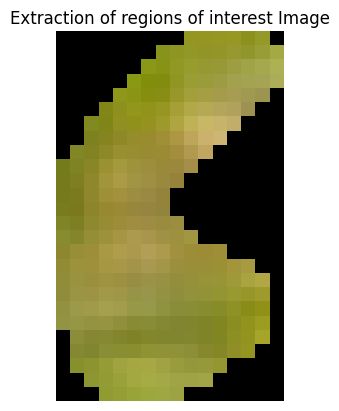

In [32]:
import os
import cv2
import matplotlib.pyplot as plt

def extract_and_save_ROIs(input_folder, output_folder):
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Loop through all images in the input folder
    for filename in os.listdir(input_folder):
        if filename.endswith(('.tif', '.jpeg', '.png')):
            # Read the image
            image_path = os.path.join(input_folder, filename)
            img = cv2.imread(image_path)

            # Convert the image to grayscale
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Apply contour detection
            contours, _ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # Loop through detected contours
            for i, contour in enumerate(contours):
                # Extract ROI
                x, y, w, h = cv2.boundingRect(contour)
                roi = img[y:y+h, x:x+w]

                # Save ROI to output folder
                output_path = os.path.join(output_folder, f"{filename.split('.')[0]}_ROI_{i}.png")
                cv2.imwrite(output_path, roi)

if __name__ == "__main__":
    input_folder = r"D:\Data"
    output_folder = r"D:\ROI"
    extract_and_save_ROIs(input_folder, output_folder)

    # Path to the output folder
    output_files = os.listdir(output_folder)
    if output_files:
        sample_output_image = os.path.join(output_folder, output_files[0])
        # Display the sample output image using matplotlib
        print('Contour Detection Algorithm')
        plt.title('Extraction of regions of interest Image')
        image = plt.imread(sample_output_image)
        plt.imshow(image)
        plt.axis('off')  # Turn off axis
        plt.show()


In [6]:
import os
import cv2
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# Define the directory containing the images
input_directory = r'D:\ROI'

# Define the directory to save the processed images
output_directory = r'D:\Processed_ROI'

# Create the output directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Define the list to store image features and corresponding labels
features = []
labels = []

# Loop through each file in the input directory
for filename in os.listdir(input_directory):
    if filename.endswith(".png"):
        # Read the image
        img_path = os.path.join(input_directory, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale
        
        # Resize the image (optional, depends on your requirements)
        img = cv2.resize(img, (128, 128))  # Adjust the size as needed
        
        # Flatten the image into a 1D array
        flattened_img = img.flatten()
        
        # Append the flattened image to the features list
        features.append(flattened_img)
        
        # Use the entire filename as the label
        labels.append(filename)

# Convert the lists to numpy arrays
X = np.array(features)

# Apply PCA for dimensionality reduction
num_components = 50  # Adjust the number of components as needed
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X)

# Encode labels into numeric values (0, 1, 2, 3)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels) % 4

# Print the features and labels after PCA
print("Features after PCA:", X_pca)
print("Labels:", y)

# Loop through each processed image and save it to the output directory
for i, pca_img in enumerate(X_pca):
    filename = labels[i]
    output_path = os.path.join(output_directory, filename)
    np.save(output_path, pca_img)

print("Processed images saved in:", output_directory)

Features after PCA: [[ 1.47831623e+03  2.02603548e+03 -1.94933659e+03 ... -2.67641997e+02
  -1.72524601e+02 -1.37860184e+02]
 [ 2.28317236e+02  1.91607352e+02 -1.50488492e+03 ...  1.74654466e+02
   2.72520460e+02  4.43454717e+02]
 [-6.91698033e+03  1.20293405e+03  6.67363839e+02 ...  1.57895589e+01
   2.83595029e+02  1.81609915e+02]
 ...
 [-2.48243803e+02  1.62470185e+02 -1.26445367e+03 ...  1.02996034e+02
  -2.92736819e+02  2.09393004e+02]
 [ 2.01433484e+03 -1.10617525e+02  2.83594510e+01 ... -1.72583975e+02
   5.64224957e+02 -1.82160909e+00]
 [-1.23046535e+03  3.44598745e+02 -9.52964125e+02 ... -1.12231890e+02
   1.44219444e+01  1.41026150e+02]]
Labels: [0 1 2 ... 1 2 3]
Processed images saved in: D:\Processed_ROI


In [7]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

# Assuming you have processed_data and labels available
X_train_data = X_pca
y_train_data = y

# Data Augmentation: Duplicate the data to increase the size
num_duplicates = 20
augmented_X = np.vstack([X_train_data] * num_duplicates)
augmented_y = np.concatenate([y_train_data] * num_duplicates)

# Data Augmentation: Adding Noise to Numerical Columns
noise_stddev = 0.3

# Convert NumPy array to a Pandas DataFrame
X_train_df = pd.DataFrame(X_train_data)

# Add noise to numerical columns
numerical_columns = X_train_df.select_dtypes(include=['number']).columns
for col in numerical_columns:
    X_train_df[col] += np.random.normal(0, noise_stddev, len(X_train_df))

# Convert back to NumPy array after adding noise
X_train_data = X_train_df.to_numpy()

# Data Augmentation: Shuffling Data
# Shuffle the data together to maintain correspondence between X and y
shuffled_indices = np.arange(len(augmented_X))
np.random.shuffle(shuffled_indices)

augmented_X = augmented_X[shuffled_indices]
augmented_y = augmented_y[shuffled_indices]

# Data Augmentation: Subsampling Data
fraction_to_keep = 0.5
num_samples_to_keep = int(len(augmented_X) * fraction_to_keep)
augmented_X = augmented_X[:num_samples_to_keep]
augmented_y = augmented_y[:num_samples_to_keep]
print("X",augmented_X.shape)
print("y",augmented_y.shape)

X (37760, 50)
y (37760,)


In [8]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Assuming X_pca and y are already defined
# Assuming num_components is defined elsewhere

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(augmented_X, augmented_y, test_size=0.1, random_state=42)

# Standardize the features (optional but can be beneficial for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the ANN model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(num_components,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='softmax')  # Output layer with 5 neurons for 0 to 4 labels
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=15, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
y_pred_probs = model.predict(X_test_scaled)
y_pred = tf.argmax(y_pred_probs, axis=1)

# Print the classification report
print(classification_report(y_test, y_pred))


Epoch 1/15


C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


850/850 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3528 - loss: 1.5164 - val_accuracy: 0.6376 - val_loss: 0.9293
Epoch 2/15
850/850 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7089 - loss: 0.7770 - val_accuracy: 0.8311 - val_loss: 0.5069
Epoch 3/15
850/850 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8750 - loss: 0.3933 - val_accuracy: 0.9026 - val_loss: 0.2887
Epoch 4/15
850/850 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9370 - loss: 0.2136 - val_accuracy: 0.9557 - val_loss: 0.1646
Epoch 5/15
850/850 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9580 - loss: 0.1399 - val_accuracy: 0.9557 - val_loss: 0.1525
Epoch 6/15
850/850 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9583 - loss: 0.1250 - val_accuracy: 0.9629 - val_loss: 0.1179
Epoch 7/15
850/850 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9655 - loss: 0.1039 - val_accuracy: 0.9670 - val_loss: 0.1021
Epoch 8/15
850/850 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9549 - loss: 0.1257 - val_accuracy: 0.9706 - val_